
# Кейс спринта


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Вам необходимо проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Вам также понадобится ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

## Цели и задачи проекта

Цель: Провести предобработку данных для заказчика, на уровне, необходимом для решения аналитических вопросов проекта, и разрабоать рекомендации по работе с проблемами, которые смогут повлиять на дальнейшую работу заказчика с данными.

Задачи:
1. Выгрузить данные датасетов и описать их, выявить проблемы, понятные и видимые на данном этапе.
2. Заменить названия (метки) столбуов на оптимальные для дальнейшей работы.
3. Проверить пропуски в данных, дать рекомендации по восстановлению утерянных данных и возможном заполнении пропусков для более эффективного анализа.
4. Проверить явные и неявные дубликаты, описать найденные проблемы, преобразовать неявные дубликаты и избавиться от явных.
5. Проверить типы данных и при необходимости оптимизировать их. Возможно к заполнению некоторых пропусков придется вернуться на данном этапе.
6. Изучить число ДТП по дням недели и месяцам, выявить, когда ДТП случаются чаще и реже и предположить причины.
7. Изучить возможные категории водителей, их стаж и число ДТП. Попробовать найти взаимосвязь между категорией водителя - стажом - числом ДТП, обозначить причины результатов.
8. Изучить число аварий по Кировской (Киров входит в численность) и Московской области (Москва исключена), обозначить, где их больше в относительном выражении (в пересчёте на 100 тысяч жителей) и почему.

## Содержание проекта

5 Проверка ошибок в данных и их предобработка
- 5.1 Выгрузка данных и знакомство с ними
- 5.2 Замена названий (меток) столбцов на оптимальные для работы
- 5.3 Проверка пропусков в данных
- 5.4 Наличие явных и неявных дубликатов в данных
- 5.5 Проверка корректности типов данных

6  Исследовательский анализ
- 6.1  Какое число ДТП случилось в каждый день недели? Какое число ДТП случилось в каждый месяц?
- 6.2  Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП?
- 6.3  Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена)? Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей?

Итоговые выводы


## Проверка ошибок в данных и их предобработка



### Выгрузка данных и знакомство с ними

In [80]:
# Импортируем необходимые библиотеки
import pandas as pd

In [81]:
# Эта ячейка исправит проблему SSL если она есть
import ssl
try:
    # Пробуем нормальный режим
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [82]:
# Загружаем датасеты с информацией о ДТП в Кировской и Московской областях
kirovskaya_oblast = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
moscowskaya_oblast = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')

# Загружаем датасеты с информацией об участниках ДТП в Кировской и Московской областях
kirovskaya_oblast_participiants = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')
moscowskaya_oblast_participiants = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_participiants.csv')

# Загружаем датасеты с информацией о транспортных средствах в Кировской и Московской областях
kirovskaya_oblast_vehicles = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')
moscowskaya_oblast_vehicles = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_vehicles.csv')

Выгрузим первые строчки каждого датасета, информацию о них, познакомимся с ними. После каждого выгруженного датасета кратко опишем проблемы оформления и особенности, в конце суммируем их и найдем решения.

In [83]:
kirovskaya_oblast.head(3)

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']


In [84]:
kirovskaya_oblast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

In [85]:
moscowskaya_oblast.head(3)

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"


In [86]:
moscowskaya_oblast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               45618 non-null  object 
 1   id                                 45618 non-null  int64  
 2   properties.tags                    45618 non-null  object 
 3   properties.light                   45618 non-null  object 
 4   properties.point.lat               45615 non-null  float64
 5   properties.point.long              45615 non-null  float64
 6   properties.nearby                  45618 non-null  object 
 7   properties.region                  45618 non-null  object 
 8   properties.scheme                  44235 non-null  float64
 9   properties.address                 43862 non-null  object 
 10  properties.weather                 45618 non-null  object 
 11  properties.category                45618 non-null  obj

Проблемы с датасетами:
- Всего 14517 строк и 18 столбцов (`kirovskaya_oblast`).
- Всего 45618 строк и 18 столбцов (`moscowskaya_oblast`).
- Названия столбцов оформлены не в едином стиле. Далее приведем их к единому стилю snake case.
- Пропуски точно содержатся в столбцах `properties.point.lat`, `properties.point.long`, `properties.scheme`, `properties.address`.
- Некоторые столбцы (такие как `properties.nearby`, `properties.weather `, `properties.road_conditions`, `properties.participant_categories` и `geometry.coordinates`) имеют такое оформление, что информация, которую они содержат, находится в квдартаных скобка [...]. То есть являются списками. Все они, вроде бы не содержат пропусков, но на самом деле они могут быть. Например, это заметно по столбцу `properties.nearby`, пропуск обозначен как пустые квадратные скобки, что делает ячейку по сути не пустой, но не информативной.
- Возможно будет оптимальнее изменить тип данных в столбце `properties.scheme` с `float64` на `int64`, так как судя по строчкам, там содержатся целые числа. Дополнительно изучим этот столбец перед сменой типа данных.
- Возможно будет оптимальнее изменить тип данных в столбце `properties.datetime` с `object` на `datetime`, так как столбец по своей сути отображает дату и время ДТП.

In [87]:
kirovskaya_oblast_participiants.head(3)

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208


In [88]:
kirovskaya_oblast_participiants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [89]:
moscowskaya_oblast_participiants.head(3)

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13.0,2163589
1,Водитель,Мужской,[],Не пострадал,13.0,2163589
2,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398


In [90]:
moscowskaya_oblast_participiants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95177 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         95177 non-null  object 
 1   gender                       93307 non-null  object 
 2   violations                   95177 non-null  object 
 3   health_status                95070 non-null  object 
 4   years_of_driving_experience  59679 non-null  float64
 5   id                           95177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


Проблемы с датасетами:
- Всего 31235 строк и 6 столбцов (`kirovskaya_oblast_participiants`).
- Всего 95177 строк и 6 столбцов (`moscowskaya_oblast_participiants`)
- Пропуски точно содержатся в столбцах `gender`,`health_status`,`years_of_driving_experience`.
- Столбец `violations` имеет странное оформление, информация, которую он содержит, находится в квдартаных скобка [...]. Столбец, вроде бы не содержит пропусков, но на самом деле они могут быть. Пропуск обозначен как пустые квадратные скобки, что делает ячейку по сути не пустой, но не информативной.
- Возможно будет оптимальнее изменить тип данных в столбце `years_of_driving_experience` с `float64` на `int64`, так как судя по строчкам, там содержатся целые числа. Дополнительно изучим этот столбец перед сменой типа данных.

In [91]:
kirovskaya_oblast_vehicles.head(3)

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208


In [92]:
kirovskaya_oblast_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


In [93]:
moscowskaya_oblast_vehicles.head(3)

,year,brand,color,model,category,id
0,2012.0,ГАЗ,Белый,Прочие модели ГАЗ,Фургоны,2163589
1,2008.0,OPEL,Черный,Astra,"С-класс (малый средний, компактный) до 4,3 м",2155398
2,2017.0,MAZDA,Черный,CX-5,"В-класс (малый) до 3,9 м",2163319


In [94]:
moscowskaya_oblast_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65606 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      63860 non-null  float64
 1   brand     64185 non-null  object 
 2   color     64765 non-null  object 
 3   model     64185 non-null  object 
 4   category  65606 non-null  object 
 5   id        65606 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


Проблемы с датасетами:
- Всего 20093 строк и 6 столбцов (`kirovskaya_oblast_vehicles`).
- Всего 65606 строк и 6 столбцов (`moscowskaya_oblast_vehicles`).
- Пропуски точно содержатся в столбцах `year`, `brand`, `color`, `model`.
- Возможно будет оптимальнее изменить тип данных в столбце `year` с `float64` на `datetime` или `int64`, так как по своей стуи этот столбец может содержать только целые числа.
- Столбец `brand` содержит названия марки транспортного средства в верхнем регистре, это надо будет исправить.

### Замена названий (меток) столбцов на оптимальные для работы

In [95]:
# Сохраняем в список желаемые названия столбцов
columns = ['coordinates', 'id', 'tags', 'light',
       'point_lat', 'point_long', 'nearby',
       'region', 'scheme', 'address',
       'weather', 'category', 'datetime',
       'injured_count', 'parent_region',
       'road_conditions', 'participants_count',
       'participant_categories']


# Передаём список атрибуту columns датафрейма
kirovskaya_oblast.columns = columns
moscowskaya_oblast.columns = columns

# Выводим названия столбцов датафрейма
display(kirovskaya_oblast.head(1))
display(moscowskaya_oblast.head(1))

display(moscowskaya_oblast.head(1))

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.24379,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']


,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.9992,37.5253,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']


,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.9992,37.5253,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']


### Проверка пропусков в данных

Посчитаем абсолютные значения пропусков в датасете по Кировской области `kirovskaya_oblast` (не забываем про особенные столбцы `nearby`, `weather `, `road_conditions`, `participant_categories` и `geometry_coordinates`).

In [96]:
kirovskaya_oblast.isna().sum().sort_values(ascending = False)

scheme                    1137
address                    674
point_lat                   32
point_long                  32
category                     0
participants_count           0
road_conditions              0
parent_region                0
injured_count                0
datetime                     0
coordinates                  0
weather                      0
id                           0
region                       0
nearby                       0
light                        0
tags                         0
participant_categories       0
dtype: int64

Пропуски есть в столбцах:
- `point_lat` (32), `point_long` (32), `scheme`(1137), `address`(674).

Далее посмотрим относительные значения пропусков в процентах.

In [97]:
round(kirovskaya_oblast.isna().sum()/len(kirovskaya_oblast), 3)*100

coordinates               0.0
id                        0.0
tags                      0.0
light                     0.0
point_lat                 0.2
point_long                0.2
nearby                    0.0
region                    0.0
scheme                    7.8
address                   4.6
weather                   0.0
category                  0.0
datetime                  0.0
injured_count             0.0
parent_region             0.0
road_conditions           0.0
participants_count        0.0
participant_categories    0.0
dtype: float64

Пропсуки в процентах составили: <a id='1'></a>
- `point_lat` (0.2%), `point_long` (0.2%), `scheme`(7.8%), `address`(4.6%).

Чтобы проанализировать природу возникновения пропусков, напомним, за что отвечают эти столбцы в датафрейме с информацией о ДТП в Кировской областе:

- `point_lat` — широта.

- `point_long` — долгота.

- `scheme` — схема ДТП.

- `address` — ближайший адрес.

ВАЖНО! Пропуски также есть в столбце `coordinates`, которые объединяет и информацию из столбцов `point_lat` и `point_long`, пропуски, соответсвенно, тоже.

Причины пропусков:
- Отсутствие широты, долготы ДТП может быть связано с техническими проблемами систем навигации или особенностями законодательства на момент ДТП в вопросе указания точных координат.

- Отсутвие схем ДТП может быть связано с незначительностью проишествия, т.е. если авария произошла с минимальными повреждения и никто не пострадал. На составление схемы ДТП может повлиять также согласие сторон или технические особенности.

- Отсуствие ближайшего адреса может быть связано с особенностями местностями и отсуствием каких-либо населенных пунктов или построек рядом с местом ДТП.

In [98]:
kirovskaya_oblast.head(3)

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']


Давайте узнаем, возможно получится восстановить пропущенные данные на основе информации из других столбцов. Посмотрим еще раз на пропуски в `address`.

In [99]:
kirovskaya_oblast[kirovskaya_oblast['address'].isna()]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
18,"[47.703667, 57.398549]",1981028,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",57.398549,47.703667,[],Яранский район,820.0,NaN,['Пасмурно'],Наезд на пешехода,2018-05-01 22:10:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
59,"[47.969474, 57.105731]",2875566,Дорожно-транспортные происшествия,Светлое время суток,57.105731,47.969474,[],Яранский район,950.0,NaN,['Ясно'],Опрокидывание,2023-08-13 16:20:00,1,Кировская область,['Сухое'],1,['Все участники']
63,"[47.891099, 57.309193]",2875597,Дорожно-транспортные происшествия,Светлое время суток,57.309193,47.891099,"['Многоквартирные жилые дома', 'Внутридворовая...",Яранский район,410.0,NaN,['Ясно'],Столкновение,2023-08-01 12:35:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
95,"[47.906871, 57.020891]",2861063,Дорожно-транспортные происшествия,Светлое время суток,57.020891,47.906871,[],Яранский район,600.0,NaN,['Пасмурно'],Съезд с дороги,2023-07-22 03:50:00,3,Кировская область,['Мокрое'],3,['Все участники']
130,"[47.828239, 57.298419]",1984517,Дорожно-транспортные происшествия,Светлое время суток,57.298419,47.828239,"['АЗС', 'Автостоянка (отделенная от проезжей ч...",Яранский район,830.0,NaN,['Ясно'],Наезд на пешехода,2020-06-25 08:50:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14489,"[51.079023, 56.227214]",1983961,Дорожно-транспортные происшествия,Светлое время суток,56.227214,51.079023,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Ясно'],Наезд на пешехода,2020-04-18 10:30:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
14497,"[51.293557, 56.251791]",1986098,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено",56.251791,51.293557,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,NaN,NaN,['Пасмурно'],Наезд на велосипедиста,2020-08-19 18:11:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Велосипедисты', 'Дети']"
14502,"[51.072639, 56.221047]",1986546,Дорожно-транспортные происшествия,Светлое время суток,56.221047,51.072639,"['Многоквартирные жилые дома', 'Внутридворовая...",Вятско-Полянский район,880.0,NaN,['Ясно'],Наезд на пешехода,2019-09-03 11:20:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
14511,"[51.1186, 56.2417]",1980230,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",56.241700,51.118600,[],Вятско-Полянский район,NaN,NaN,['Ясно'],Наезд на препятствие,2018-07-02 19:25:00,1,Кировская область,"['Сухое', 'Дефекты покрытия']",1,"['Все участники', 'Мотоциклисты']"


Можно заметить, что в некоторых строках с пустым адресом заполнены столбцы со зданиями, которые находятся рядом с местом ДТП и столбцы с координатами. Поэтому чисто теоретически можно восстановить адрес с помощью этих столбцов.

In [100]:
kirovskaya_oblast[kirovskaya_oblast['point_lat'].isna()]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
391,"[None, None]",1985738,Дорожно-транспортные происшествия,Сумерки,NaN,NaN,[],Шабалинский район,NaN,"пгт Ленинское, ул Гагарина, 89",['Ясно'],Отбрасывание предмета,2015-05-25 22:00:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы', 'Дети']"
1029,"[None, None]",1986653,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,[],Свечинский район,610.0,Котельнич - Свеча - Ленинское - гр. Костромско...,['Пасмурно'],Съезд с дороги,2015-04-24 07:00:00,1,Кировская область,['Мокрое'],2,['Все участники']
2198,"[None, None]",1986337,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,['Жилые дома индивидуальной застройки'],Нолинский район,850.0,"с Кырчаны, ул Ленина, 10",['Пасмурно'],Наезд на пешехода,2016-09-05 20:10:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
2227,"[None, None]",1985083,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,[],Нолинский район,90.0,"Киров - Малмыж - Вятские Поляны, 110 км",['Пасмурно'],Столкновение,2016-06-12 20:50:00,2,Кировская область,"['Мокрое', 'Дефекты покрытия']",5,['Все участники']
2269,"[None, None]",1985078,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,['Жилые дома индивидуальной застройки'],Нолинский район,200.0,"д Среднее, ул Свободы, 72",['Ясно'],Наезд на велосипедиста,2016-06-23 13:50:00,1,Кировская область,['Сухое'],3,"['Все участники', 'Велосипедисты', 'Дети']"
2274,"[None, None]",1986660,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,[],Нолинский район,610.0,"Кырчаны - Нема - Кильмезь, 1 км",['Ясно'],Опрокидывание,2015-04-02 09:45:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']
2293,"[None, None]",1985081,Дорожно-транспортные происшествия,Светлое время суток,NaN,NaN,"['Выезд с прилегающей территории', 'Одиночный ...",Нолинский район,330.0,"д Перевоз, ул Советская, 89б",['Ясно'],Столкновение,2016-06-14 09:50:00,1,Кировская область,['Сухое'],2,['Все участники']
2306,"[None, None]",1984230,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,[],Нолинский район,200.0,"Киров - Малмыж - Вятские Поляны, 120 км",['Пасмурно'],Столкновение,2015-12-26 16:05:00,1,Кировская область,['Сухое'],3,['Все участники']
2309,"[None, None]",1987238,Дорожно-транспортные происшествия,Сумерки,NaN,NaN,['Производственное предприятие'],Нолинский район,840.0,"г Нолинск, ул Пригородная, 33",['Пасмурно'],Наезд на пешехода,2015-03-19 18:57:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2688,"[None, None]",1985539,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,NaN,[],Малмыжский район,820.0,"Киров - Малмыж - Вятские Поляны, 273 км",['Ясно'],Наезд на пешехода,2015-11-07 17:39:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"


Аналогично со столбцами с координатами: можно восстановить координаты ДТП по адресам, которые в некоторых строках также не являются пропусками.

Что делать с пропусками, если нет возможности восстановить потерянные данные? <a id='2'></a>
- Пропсуки в `point_lat`и `point_long` можно удалить, так как они составили менее 1%.

- Пропсуки в `scheme` можно оставить как есть, так как столбец содержит численный формат данных и заглушки в виде -1, 0, 1 и т.п. могут исказить возможные расчеты и работу с данными.

- Пропуски в `address` можно заменить на "без адреса", так как в любом случае столбец содержит строки и данная заглушка не исказит данные.

В дальнейшем можно обязать заполнять некоторые поля, чтобы пропуски больше не встречались.

Поработаем также с пропусками в датасетах `kirovskaya_oblast_participiants` и `kirovskaya_oblast_vehicles`.

In [101]:
kirovskaya_oblast_participiants.isna().sum().sort_values(ascending = False)

years_of_driving_experience    14326
gender                           848
health_status                    100
role                               0
violations                         0
id                                 0
dtype: int64

Промежуточные итоги:

Можно заметить, что пропуски есть только в 3 столбцах, опишем сразу их возможные значения:
1. `years_of_driving_experience` - 14326. Возможные причины, что данная строка описывает участника, не имеющего водительских прав (пассажиры автомобиля или пешеходы, например). Или возможно водитель не имеет страховки, куда обычно вписывают водительский стаж.
2. `gender`- 848. Эти пропуски скорее всего носят технический характер, так как все участники ДТП имеют пол и его должны были бы внести в датасет.
3. `health_status` - 100. Если посе ДТП некоторые участники покинули место проишествия или не обращались за медицинской помощью, то это могло послужить причиной пропусков в данном столбце.

In [102]:
round(kirovskaya_oblast_participiants.isna().sum()/len(kirovskaya_oblast_participiants), 3)*100

role                            0.0
gender                          2.7
violations                      0.0
health_status                   0.3
years_of_driving_experience    45.9
id                              0.0
dtype: float64

Промежуточные итоги:

Опишем относительные значения пропусков по столбцам и напишем, что делать:
1. `years_of_driving_experience` - 45.9%. Слишком большой процент пропусков от общего кол-ва строк, удалить точно не получится. Можно поставить заглушки на место пропусков, например -1, так как по логике водительский стаж не может быть отрицательным. Можно оставить пропуски как есть, чтобы не искажать анализ.
2. `gender`- 2.7%. Эти пропуски следует оставить как есть, так как в относительном выражении их кол-во превышает 1% и удалить их невозможно.
3. `health_status` - 0.3%. Несмотря на то, что данные пропуски составиили менее 1%, следует их оставить как есть, чтобы не потерять возможно ценные для анализа данные.

In [103]:
kirovskaya_oblast_vehicles.isna().sum().sort_values(ascending = False)

year        794
brand       775
model       775
color       450
category      0
id            0
dtype: int64

Промежуточные итоги:

Можно заметить, что пропуски есть только в 4 столбцах, опишем сразу их возможные значения:
1. `year` - 784. Скорее всего техническая ошибка, так как узнать год выпуска автомобиля при необходимости не сложно. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).
2. `brand`- 765. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).
3. `model` - 765. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода). Можно восстановить бренд автомобиля по названию модели, если эта строка не пропущена, и наоборот.
4. `color` - 443. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).

In [104]:
round(kirovskaya_oblast_vehicles.isna().sum()/len(kirovskaya_oblast_vehicles), 3)*100

year        4.0
brand       3.9
color       2.2
model       3.9
category    0.0
id          0.0
dtype: float64

Промежуточные итоги:

Опишем относительные значения пропусков по столбцам и напишем, что делать:
1. `year` - 3.9%. Можно оставить как есть, чтобы не искажать данные, но можно поставить заглушку в виде -1 или 0, так как, очевидно, год не может быть стаким значением.  
2. `brand`- 3.8% Можно оставить как есть или прописать вместо пропусков "без бренда".
3. `model` - 3.8%. Можно оставить как есть или прописать вместо пропусков "без модели".
4. `color` - 2.2%. Можно оставить как есть или прописать вместо пропусков "без цвета".

Далее проделаем всю ту же работу с датасетами по Московской области, будем избегать развернутых комментариев, чтобы сэкономить время.

Посчитаем абсолютные значения пропусков в датасете по Московской области `moscowskaya_oblast` (не забываем про особенные столбцы `nearby`, `weather `, `road_conditions`, `participant_categories` и `geometry_coordinates`).

In [105]:
moscowskaya_oblast.isna().sum().sort_values(ascending = False)

address                   1756
scheme                    1383
point_lat                    3
point_long                   3
category                     0
participants_count           0
road_conditions              0
parent_region                0
injured_count                0
datetime                     0
coordinates                  0
weather                      0
id                           0
region                       0
nearby                       0
light                        0
tags                         0
participant_categories       0
dtype: int64

Пропуски есть в столбцах:
- `point_lat` (3), `point_long` (3), `scheme`(1383), `address`(1756).

Далее посмотрим относительные значения пропусков в процентах.

In [106]:
round(moscowskaya_oblast.isna().sum()/len(moscowskaya_oblast), 5)*100

coordinates               0.000
id                        0.000
tags                      0.000
light                     0.000
point_lat                 0.007
point_long                0.007
nearby                    0.000
region                    0.000
scheme                    3.032
address                   3.849
weather                   0.000
category                  0.000
datetime                  0.000
injured_count             0.000
parent_region             0.000
road_conditions           0.000
participants_count        0.000
participant_categories    0.000
dtype: float64

Давайте узнаем, возможно получится восстановить пропущенные данные на основе информации из других столбцов. Посмотрим еще раз на пропуски в `address`.

Пропсуки в процентах составили:
-`point_lat` (0.007%), `point_long` (0.007%), `scheme`(3.032%), `address`(3.849%).

[Далее описание пропусков повторяет то, что было указано в блоке про Кировскую область.](#1)

In [107]:
moscowskaya_oblast[moscowskaya_oblast['address'].isna()]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
43,"[38.0241, 56.1149]",2148422,['Дорожно-транспортные происшествия'],Светлое время суток,56.114900,38.024100,['Жилые дома индивидуальной застройки'],Сергиево-Посадский,930.0,NaN,['Ясно'],Наезд на препятствие,2016-06-24 09:30:00,1,Московская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
129,"[39.098217, 55.52959]",2555064,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.529590,39.098217,['Жилые дома индивидуальной застройки'],Орехово-Зуево,910.0,NaN,['Ясно'],Наезд на стоящее ТС,2021-03-23 04:00:00,1,Московская область,"['Мокрое', 'Отсутствие освещения']",2,['Все участники']
149,"[37.774612, 55.391446]",2137771,['Дорожно-транспортные происшествия'],Светлое время суток,55.391446,37.774612,"['АЗС', 'Автостоянка (отделенная от проезжей ч...",Домодедово,820.0,NaN,['Ясно'],Наезд на пешехода,2019-09-24 17:50:00,1,Московская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
175,"[37.901389, 55.418333]",2154311,['Дорожно-транспортные происшествия'],Светлое время суток,55.418333,37.901389,"['Автостоянка (отделенная от проезжей части)',...",Домодедово,820.0,NaN,['Пасмурно'],Наезд на пешехода,2015-09-04 15:30:00,1,Московская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
176,"[37.7064, 55.4678]",2132399,['Дорожно-транспортные происшествия'],Светлое время суток,55.467800,37.706400,['Крупный торговый объект (являющийся объектом...,Домодедово,830.0,NaN,['Дождь'],Наезд на пешехода,2016-08-15 08:00:00,1,Московская область,['Мокрое'],2,"['Все участники', 'Пешеходы']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45339,"[38.330032, 55.727899]",2537710,['Дорожно-транспортные происшествия'],Светлое время суток,55.727899,38.330032,['Многоквартирные жилые дома'],Ногинский,930.0,NaN,['Ясно'],Наезд на препятствие,2021-01-18 11:40:00,1,Московская область,"['Недостатки зимнего содержания', 'Со снежным ...",3,['Все участники']
45371,"[38.5531, 54.8475]",2148891,['Дорожно-транспортные происшествия'],Светлое время суток,54.847500,38.553100,"['Жилые дома индивидуальной застройки', 'Нерег...",Озёрский,400.0,NaN,['Ясно'],Наезд на велосипедиста,2018-05-21 17:45:00,1,Московская область,['Сухое'],2,"['Все участники', 'Велосипедисты']"
45409,"[37.190051, 55.682206]",2702762,['Дорожно-транспортные происшествия'],Светлое время суток,55.682206,37.190051,"['Нерегулируемый пешеходный переход', 'Медицин...",Власиха,880.0,NaN,['Ясно'],Наезд на пешехода,2022-06-09 14:15:00,1,Московская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
45495,"[36.53068, 55.34451]",2148456,['Дорожно-транспортные происшествия'],Светлое время суток,55.344510,36.530680,[],Наро-Фоминский,610.0,NaN,['Ясно'],Наезд на препятствие,2017-04-30 10:15:00,1,Московская область,['Сухое'],1,['Все участники']


Можно заметить, что в некоторых строках с пустым адресом заполнены столбцы со зданиями, которые находятся рядом с местом ДТП и столбцы с координатами. Поэтому чисто теоретически можно восстановить адрес с помощью этих столбцов.

In [108]:
moscowskaya_oblast[moscowskaya_oblast['point_lat'].isna()]

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
15057,"[None, None]",2159232,['Дорожно-транспортные происшествия'],Сумерки,NaN,NaN,[],Жуковский,610.0,"г Жуковский, ул Амет-хан Султана, 21",['Пасмурно'],Наезд на препятствие,2015-07-15 21:30:00,1,Московская область,['Сухое'],1,['Все участники']
17511,"[None, None]",2139758,['Дорожно-транспортные происшествия'],Светлое время суток,NaN,NaN,[],Орехово-Зуевский,200.0,"АВСЮНИНО-СТЕПАНОВКА-ЦАПЛИНО, 1 км",['Ясно'],Наезд на велосипедиста,2016-10-01 16:30:00,1,Московская область,['Сухое'],2,"['Все участники', 'Велосипедисты', 'Мотоциклис..."
29943,"[None, None]",2131478,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",NaN,NaN,['Крупный торговый объект (являющийся объектом...,Красногорский,730.0,"г Красногорск, ш Волоколамское",['Дождь'],Наезд на пешехода,2015-05-29 22:00:00,1,Московская область,['Мокрое'],2,"['Все участники', 'Пешеходы']"


Аналогично со столбцами с координатами: можно восстановить координаты ДТП по адресам, которые в некоторых строках также не являются пропусками.

Что делать с пропусками, если нет возможности восстановить потерянные данные: [См. рекомендации по работе с похожим пропусками в датасетах по Кировской области.](#2)

Поработаем также с пропусками в датасетах `moscowskaya_oblast_participiants` и `moscowskaya_oblast_vehicles`.

In [109]:
moscowskaya_oblast_participiants.isna().sum().sort_values(ascending = False)

years_of_driving_experience    35498
gender                          1870
health_status                    107
role                               0
violations                         0
id                                 0
dtype: int64

Промежуточные итоги:

Можно заметить, что пропуски есть только в 3 столбцах, опишем сразу их возможные значения:
1. `years_of_driving_experience` - 35498. Возможные причины, что данная строка описывает участника, не имеющего водительских прав (пассажиры автомобиля или пешеходы, например). Или возможно водитель не имеет страховки, куда обычно вписывают водительский стаж.
2. `gender`- 1870. Эти пропуски скорее всего носят технический характер, так как все участники ДТП имеют пол и его должны были бы внести в датасет.
3. `health_status` - 107. Если посе ДТП некоторые участники покинули место проишествия или не обращались за медицинской помощью, то это могло послужить причиной пропусков в данном столбце.

In [110]:
round(moscowskaya_oblast_participiants.isna().sum()/len(moscowskaya_oblast_participiants), 3)*100

role                            0.0
gender                          2.0
violations                      0.0
health_status                   0.1
years_of_driving_experience    37.3
id                              0.0
dtype: float64

Промежуточные итоги:

Опишем относительные значения пропусков по столбцам и напишем, что делать:
1. `years_of_driving_experience` - 37.3%. Слишком большой процент пропусков от общего кол-ва строк, удалить точно не получится. Можно поставить заглушки на место пропусков, например -1, так как по логике водительский стаж не может быть отрицательным. Можно оставить пропуски как есть, чтобы не искажать анализ.
2. `gender`- 2.0%. Эти пропуски следует оставить как есть, так как в относительном выражении их кол-во превышает 1% и удалить их невозможно.
3. `health_status` - 0.1%. Несмотря на то, что данные пропуски составиили менее 1%, следует их оставить как есть, чтобы не потерять возможно ценные для анализа данные.

In [111]:
moscowskaya_oblast_vehicles.isna().sum().sort_values(ascending = False)

year        1746
brand       1421
model       1421
color        841
category       0
id             0
dtype: int64

Промежуточные итоги:

Можно заметить, что пропуски есть только в 4 столбцах, опишем сразу их возможные значения:
1. `year` - 1746. Скорее всего техническая ошибка, так как узнать год выпуска автомобиля при необходимости не сложно. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).
2. `brand`- 1421. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).
3. `model` - 1421. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода). Можно восстановить бренд автомобиля по названию модели, если эта строка не пропущена, и наоборот.
4. `color` - 841. Скорее всего техническая ошибка. Либо в данном ДТП не участвовал автомобиль(например, ДТП произошла при участии велосипедиста и пешехода).

In [112]:
round(moscowskaya_oblast_vehicles.isna().sum()/len(moscowskaya_oblast_vehicles), 3)*100

year        2.7
brand       2.2
color       1.3
model       2.2
category    0.0
id          0.0
dtype: float64

Промежуточные итоги:

Опишем относительные значения пропусков по столбцам и напишем, что делать:
1. `year` - 2.7%. Можно оставить как есть, чтобы не искажать данные, но можно поставить заглушку в виде -1 или 0, так как, очевидно, год не может быть стаким значением.  
2. `brand`- 2.2% Можно оставить как есть или прописать вместо пропусков "без бренда".
3. `model` - 2.2%. Можно оставить как есть или прописать вместо пропусков "без модели".
4. `color` - 1.3%. Можно оставить как есть или прописать вместо пропусков "без цвета".

Итоговый вывод:
- Были проанализированы все датасеты и их пропуски и предложены варианты работы с этими пропусками. Чтобы не искажать информацию в рамках данного проекта было принято решение оставить пропуски как есть и не применять заглушек. Для полноценной работы с данными датасетами, конечно, эту проблему также стоит решить.
- Также считаю отметить важным, что некоторые столбцы (такие как `nearby`, `weather `, `road_conditions`, `participant_categories` и `coordinates`) имеют такое оформление, что информация, которую они содержат, находится в квдартаных скобка [...]. То есть являются списками. Все они, вроде бы не содержат пропусков, но на самом деле они могут быть. Например, это заметно по столбцу `nearby`, пропуск обозначен как пустые квадратные скобки, что делает ячейку по сути не пустой, но не информативной. В рамках дпнного проекта вряд ли это помешает анализу, но если бы мы далее работали с этими датасетами, то данную проблему пришлось бы решить.

### Наличие явных и неявных дубликатов в данных



Для начала разберемся с неявными дубликатами. Будем работать также на примере таблиц, связанных с Кировской областью. Начнем с таблицы `kirovskaya_oblast`

In [113]:
display(kirovskaya_oblast.nunique().sort_values(ascending = False))

display()

display(kirovskaya_oblast['id'].unique())

display()

display(kirovskaya_oblast['tags'].unique())

display()

display(kirovskaya_oblast['nearby'].unique())

display()

display(kirovskaya_oblast['region'].unique())

display()

display(kirovskaya_oblast['address'].unique())

display()

display(kirovskaya_oblast['weather'].unique())

display()

display(kirovskaya_oblast['category'].unique())

display()

display(kirovskaya_oblast['parent_region'].unique())

display()

display(kirovskaya_oblast['road_conditions'].unique())

display()

display(kirovskaya_oblast['participant_categories'].unique())

id                        14517
datetime                  14398
coordinates               14279
point_long                12451
point_lat                 12307
address                    7638
nearby                     2644
road_conditions             827
scheme                       59
region                       40
participant_categories       23
weather                      18
category                     16
participants_count           14
injured_count                12
light                         5
tags                          1
parent_region                 1
dtype: int64

array([1983180, 2889433, 2591208, ..., 1985949, 1986807, 1987515],
      shape=(14517,))

array(['Дорожно-транспортные происшествия'], dtype=object)

array(['[]',
       "['Административные здания', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый пешеходный переход']",
       "['Жилые дома индивидуальной застройки', 'Нерегулируемый перекрёсток равнозначных улиц (дорог)']",
       ...,
       "['Многоквартирные жилые дома', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый перекрёсток', 'Лечебные учреждения']",
       "['Многоквартирные жилые дома', 'Иной объект', 'Нерегулируемый пешеходный переход', 'Спортивные и развлекательные объекты']",
       "['Многоквартирные жилые дома', 'Жилые дома индивидуальной застройки', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый перекрёсток']"],
      shape=(2644,), dtype=object)

array(['Яранский район', 'Шабалинский район', 'Фаленский район',
       'Уржумский район', 'Унинский район', 'Тужинский район',
       'Сунский район', 'Советский район', 'Свечинский район',
       'Санчурский район', 'Подосиновский район', 'Пижанский район',
       'Орловский район', 'Оричевский район', 'Опаринскийрайон',
       'Омутнинский район', 'Нолинский район', 'Немский район',
       'Нагорский район', 'Мурашинский район', 'Малмыжский район',
       'Лузский район', 'Лебяжский район', 'Куменский район',
       'Кильмезский район', 'Кикнурский район', 'Зуевский район',
       'Даровской район', 'Верхошижемский район', 'Верхнекамский район',
       'Богородский район', 'Белохолуницкий район', 'Афанасьевский район',
       'Арбажский район', 'Киров', 'Юрьянский район',
       'Котельничский район', 'Слободской район', 'Кирово-Чепецки район',
       'Вятско-Полянский район'], dtype=object)

array(['Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - Сыктывкар (основное направление), 166 км',
       'г Яранск, ул Кирова, 10', 'г Яранск, ул Чапаева, 80', ...,
       'г Вятские Поляны, ул Тойменка, 31',
       'г Сосновка, ул Солнечная, 11',
       'г Вятские Поляны, ул Набережная, 6'], shape=(7639,), dtype=object)

array(["['Дождь']", "['Ясно']", "['Пасмурно']", "['Снегопад']",
       "['Снегопад', 'Метель']", "['Пасмурно', 'Дождь']", "['Туман']",
       "['Пасмурно', 'Температура ниже -30С']",
       "['Пасмурно', 'Снегопад']", "['Ясно', 'Температура выше +30С']",
       "['Пасмурно', 'Туман']", "['Метель']", "['Пасмурно', 'Метель']",
       "['Ясно', 'Температура ниже -30С']",
       "['Пасмурно', 'Ураганный ветер']", "['Ясно', 'Туман']",
       "['Дождь', 'Туман']", "['Дождь', 'Снегопад']"], dtype=object)

array(['Опрокидывание', 'Наезд на пешехода', 'Съезд с дороги',
       'Столкновение', 'Наезд на препятствие', 'Наезд на велосипедиста',
       'Наезд на животное', 'Наезд на стоящее ТС', 'Падение пассажира',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы',
       'Иной вид ДТП', 'Отбрасывание предмета',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность',
       'Наезд на внезапно возникшее препятствие', 'Падение груза'],
      dtype=object)

array(['Кировская область'], dtype=object)

array(["['Мокрое']",
       "['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Неправильное применение, плохая видимость дорожных знаков']",
       "['Сухое']",
       "['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
       "['Заснеженное']",
       "['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Отсутствие освещения']",
       "['Мокрое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
       "['Обработанное противогололедными материалами']",
       "['Мокрое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Неровное покрытие']",
       "['Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Обработанное противогололедными материалами']",
       "['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Отсутствие пешеходных ограждений в необходимых местах']",
       "['Отсу

array(["['Все участники']", "['Все участники', 'Пешеходы']",
       "['Все участники', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты']", "['Все участники', 'Дети']",
       "['Все участники', 'Пешеходы', 'Дети']",
       "['Все участники', 'Пешеходы', 'Общ. транспорт', 'Дети']",
       "['Все участники', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Велосипедисты', 'Дети']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']",
       "['Мотоциклисты', 'Все участники']",
       "['Все участники', 'Общ. транспорт']",
       "['Все участники', 'Пешеходы', 'Велосипедисты']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Общ. транспорт', 'Дети']",
       "['Все участники', 'Пешеходы', 'Общ. транспорт']",
       "['Пешеходы', 'Все участники']",
       "['Все участники', 'Пешеходы', 'Велосипедисты'

Промежуточный итог:
- Можно заметить, что в столбце `participant_categories` есть значение, по своей сути одинаковые, только порядок информации разный, например:
1. "['Все участники', 'Пешеходы', 'Дети']" и "['Пешеходы', 'Дети', 'Все участники']";
2. "['Пешеходы', 'Все участники']" и "['Все участники', 'Пешеходы']";
3. "['Общ. транспорт', 'Все участники']" и "['Все участники', 'Общ. транспорт']";
4. "['Мотоциклисты', 'Все участники']" и "['Все участники', 'Мотоциклисты']";
5. "['Общ. транспорт', 'Дети', 'Все участники']" и "['Все участники', 'Общ. транспорт', 'Дети']".
Подобные дубликаты можно заменить один на другой, чтобы была только одна вариация последовательности категории участников ДТП.
- В остальных столбцах неявных дубликатов обнаружено не было. Важно также отметить, что в столбце `id` кол-во уникальных значений соответвует общему числу строк в таблице. Это свидетельствует о том, что явных и неявных дубликатов по данному столбцу нет.

In [114]:
kirovskaya_oblast['participant_categories'] = kirovskaya_oblast['participant_categories'].replace(
    {"['Пешеходы', 'Дети', 'Все участники']" : "['Все участники', 'Пешеходы', 'Дети']",
     "['Пешеходы', 'Все участники']" : "['Все участники', 'Пешеходы']",
     "['Общ. транспорт', 'Все участники']" : "['Все участники', 'Общ. транспорт']",
     "['Мотоциклисты', 'Все участники']" : "['Все участники', 'Мотоциклисты']",
     "['Общ. транспорт', 'Дети', 'Все участники']" : "['Все участники', 'Общ. транспорт', 'Дети']"
    })

display(kirovskaya_oblast['participant_categories'].unique())
print(f"Число уникальных значений по столбцу с категориями участников = {kirovskaya_oblast['participant_categories'].nunique()}")

array(["['Все участники']", "['Все участники', 'Пешеходы']",
       "['Все участники', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты']", "['Все участники', 'Дети']",
       "['Все участники', 'Пешеходы', 'Дети']",
       "['Все участники', 'Пешеходы', 'Общ. транспорт', 'Дети']",
       "['Все участники', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Велосипедисты', 'Дети']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Общ. транспорт']",
       "['Все участники', 'Пешеходы', 'Велосипедисты']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Общ. транспорт', 'Дети']",
       "['Все участники', 'Пешеходы', 'Общ. транспорт']",
       "['Все участники', 'Пешеходы', 'Велосипедисты', 'Дети']"],
      dtype=object)

Число уникальных значений по столбцу с категориями участников = 18


Мы исправиили данную ошибку в данных. Можно заметить, что число уникальных значений уменьщилось с 23 до 18 (ровно на 5, сколько пунктов мы описали выше). Далее поработаем с таблицей `kirovskaya_oblast_participants` на наличие неявных дубликатов.

In [115]:
display(kirovskaya_oblast_participiants.nunique().sort_values(ascending = False))

display()

display(kirovskaya_oblast_participiants['id'].unique())

display()

display(kirovskaya_oblast_participiants['role'].unique())

display()

display(kirovskaya_oblast_participiants['gender'].unique())

display()

display(kirovskaya_oblast_participiants['violations'].unique())

display()

display(kirovskaya_oblast_participiants['health_status'].unique())


id                             13340
violations                      1435
years_of_driving_experience       63
health_status                      7
role                               5
gender                             2
dtype: int64

array([1983180, 2889433, 2591208, ..., 1986801, 1982172, 2766750],
      shape=(13340,))

array(['Водитель', 'Пассажир', 'Велосипедист', 'Пешеход',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира'],
      dtype=object)

array(['Мужской', 'Женский', nan], dtype=object)

array(["['Несоответствие скорости конкретным условиям движения', 'Управление ТС в состоянии алкогольного опьянения']",
       '[]',
       "['Несоответствие скорости конкретным условиям движения', 'Управление ТС в состоянии алкогольного опьянения', 'Эксплуатация незарегистрированного ТС', 'Несоблюдение требований ОСАГО']",
       ...,
       "['Иные нарушения', 'Нахождение на проезжей части без цели её перехода', 'Пешеход в состоянии алкогольного опьянения']",
       "['Игра на проезжей части', 'Иные нарушения', 'Нахождение на проезжей части без цели её перехода']",
       "['Неподчинение сигналам регулирования', 'Неожиданный выход из-за ТС']"],
      shape=(1435,), dtype=object)

array(['Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара',
       'Не пострадал',
       'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)',
       'Раненый, находящийся (находившийся) на стационарном лечении',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)',
       nan,
       'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'],
      dtype=object)

Промежуточные итоги:
- Неявных дубликатов выявлено не было ни в одном из столбцов.
- Важно отметить, что строк в этой таблице 31235, а по столбцу `id` уникальных значений 13340, то есть присутсвуют дубликаты, которые мы проверим и возможно удалим дальше.

Проверим последнюю таблицу по Кировской области `kirovskaya_oblast_vehicles`.


In [116]:
display(kirovskaya_oblast_vehicles.nunique().sort_values(ascending = False))

display()

display(kirovskaya_oblast_vehicles['id'].unique())

display()

display(kirovskaya_oblast_vehicles['brand'].unique())

display()

display(kirovskaya_oblast_vehicles['color'].unique())

display()

display(kirovskaya_oblast_vehicles['model'].unique())

display()

display(kirovskaya_oblast_vehicles['category'].unique())

id          13247
model         847
brand         158
category       69
year           63
color          13
dtype: int64

array([1983180, 2889433, 2591208, ..., 2998217, 2998225, 2998229],
      shape=(13247,))

array(['ВАЗ', 'CHEVROLET', 'RENAULT', 'MERCEDES', 'FORD', 'VOLKSWAGEN',
       'ГАЗ', 'CHERY', nan, 'TOYOTA', 'HYUNDAI', 'ЛАЗ', 'KIA',
       'MITSUBISHI', 'FREIGHTLINER', 'SCANIA', 'УАЗ', 'КАМАЗ',
       'Прочие марки ТС', 'SUZUKI', 'DAEWOO', 'VOLVO', 'Datsun',
       'SSANGYONG', 'BMW', 'OPEL', 'SUBARU', 'МАЗ-МАН', 'FAW', 'SKODA',
       'Прочие марки мотоциклов', 'ИЖ', 'LEXUS', 'МОСКВИЧ', 'IVECO',
       'ЗИД', 'NISSAN', 'МАЗ', 'AUDI', 'MAN', 'DAF', 'HONDA', 'ЗАЗ',
       'ISUZU', 'CITROEN', 'PEUGEOT', 'MAZDA', 'HIGER', 'FIAT', 'ПАЗ',
       'Прочие марки легковых ТС', 'YAMAHA', 'УРАЛ', 'BETA', 'ЗИЛ',
       'MINSK', 'JIANGLING', 'LIFAN', 'SITRAK', 'GEELY', 'SHACMAN',
       'INFINITI', 'БОГДАН', 'JAWA-CZ', 'LAND ROVER', 'DNEPR', 'ВОСХОД',
       'DACIA', 'HUMMER', 'Прочие марки грузовых ТС',
       'Прочие марки строительной техники', 'ROVER', 'KAWASAKI',
       'YANGTZE', 'GREAT WALL', 'HAFEI', 'BAJAJ', 'SAAB', 'PORSCHE', 'BM',
       'HAIMA', 'IRISBUS', 'DONINVEST', 'DODGE', 'ЛИА

array(['Серый', 'Зеленый', 'Синий', 'Белый', nan, 'Красный', 'Черный',
       'Коричневый', 'Оранжевый', 'Фиолетовый', 'Иные цвета', 'Желтый',
       'Не заполнено', 'Многоцветный'], dtype=object)

array(['Kalina', 'Niva', 'Logan', 'ВАЗ 2115 и модификации',
       'Прочие модели Mercedes', 'Mondeo', 'Granta (Гранта)', 'Caravelle',
       ' Жигули  ВАЗ-2108, 09 и модификации                       ',
       'Прочие модели ГАЗ', 'ВАЗ 2114 и модификации',
       'Прочие модели Chery', nan, 'ВАЗ 2110, 21101, 21102, 21103, 21108',
       'Avensis', 'Прочие модели Hyundai', 'ВАЗ 2112 и модификации',
       'Passat', 'Golf', 'Priora', 'Lanos',
       'ВАЗ 2111, 21110 (универсал), 21113, 21114',
       ' Жигули  ВАЗ-2107 модификации', 'CLK', 'Focus', '699', 'Ceed',
       'Lancer', 'Largus (Ларгус)', 'Century Class S/T', 'R', '3909',
       '5321', 'Прочие марки и модели ТС', 'SX4', 'Nexia', 'FH',
       'Прочие модели КАМАЗ', 'on-DO', 'Elantra (Lantra, Avante)',
       'Kyron', 'Rio', 'X6', 'Actros', 'Astra', 'Tiggo',
       'УАЗ 3151, 31512, 31514, 31519 и модификации', 'Tercel',
       'Tiggo 7 Pro Max', 'Grand Vitara', ' Ока  ВАЗ-1111 и модификации',
       'Impreza', ' Жигули  ВАЗ-21

array(['А-класс (особо малый) до 3,5 м',
       'С-класс (малый средний, компактный) до 4,3 м', 'Фургоны',
       'В-класс (малый) до 3,9 м', 'Прочие легковые автомобили',
       'D-класс (средний) до 4,6 м', 'Автобусы (без типа)',
       'Седельные тягачи', 'Квадроциклы',
       'Прочие самоходные машины и механизмы', 'Квадрициклы',
       'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'Иные ТС', 'Прочие грузовые автомобили',
       'Бортовые грузовые автомобили', 'Мотоциклы', 'Велосипеды',
       'Мотовелосипеды',
       'Транспортные средства для перевозки денежной выручки и ценных грузов',
       'Одноэтажные длиной от 5 до 8 м', 'Иные мототранспортные средства',
       'Бортовые', 'Одноэтажные длиной от 8 до 12 м', 'Цистерны',
       'Автолесовозы', 'Прочие одноярусные',
       'Минивэны и универсалы повышенной вместимости',
       'Прочая спецтехника', 'Самоходные мотоблоки', 'Рефрижераторы',
       'Снегоходы', 'Тракторы', 'Прочие',
       'Мопеды с электро

Промежуточные итоги:
- Неявных дубликатов обнаружено не было ни в одном столбце.
- Также важно отметить, что всего строк в данной таблице 20093, а  а по столбцу `id` уникальных значений 13247, то есть присутсвуют дубликаты, которые мы проверим и возможно удалим дальше.

Далее поработаем с явными дубликатами.

In [117]:
# На всякий случай проверим явные дубликаты в таблице kirovskaya_oblast по связке время-долгота-широта
kirovskaya_oblast.duplicated(subset=['datetime', 'point_long', 'point_lat'], keep = 'first').sum()

np.int64(0)

Дубликатов, как было упомянуто ранее, в основной таблице с информацией о ДТП в Кировской области обнаружено не было. Это очень хорошо для дальнейшего анализа. Проверим остальные таблицы.

In [118]:
display(kirovskaya_oblast_participiants.duplicated(subset='id', keep = 'first').sum())
display(kirovskaya_oblast_participiants.duplicated(keep = 'first').sum())

np.int64(17895)

np.int64(9727)

In [119]:
display(kirovskaya_oblast_vehicles.duplicated(subset='id', keep = 'first').sum())
display(kirovskaya_oblast_vehicles.duplicated(keep = 'first').sum())

np.int64(6846)

np.int64(18)

Промежуточные итоги:
- Мы проверили количество явных дубликатов по столбцу `id` и всем столбцам в таблицах `kirovskaya_oblast_participiants` и `kirovskaya_oblast_vehicles`. Так как в некоторых ДТП есть несколько участников и несколько транспортных средств, то в порядке нормы, что некоторые `id` повторяются и в таких больших количествах. Но не нормально, что есть полные дубликаты по строке, где несколько раз повторяются одни и те же строки полностью. В таблице `kirovskaya_oblast_participiants` таких дубликатов 9727, что достаточно много в абсолютном значении. В таблице `kirovskaya_oblast_vehicles` таких дубликатов в абсолютном значении немного, всего 18. Давайте рассмотрим относительные значения количества дубликатов. После этого от них будет необходимо избавиться, чтобы результаты дальнейшего анализа были более точные.

In [120]:
dupl_sum_1 = kirovskaya_oblast_participiants.duplicated(keep = 'first').sum()

total_1 = kirovskaya_oblast_participiants.shape[0]

part_1 = dupl_sum_1/total_1*100

dupl_sum_2 = kirovskaya_oblast_vehicles.duplicated(keep = 'first').sum()

total_2 = kirovskaya_oblast_vehicles.shape[0]

part_2 = dupl_sum_2/total_2*100

print(f"Относительное количество дубликатов в таблице kirovskaya_oblast_participiants составило {part_1} %")
print(f"Относительное количество дубликатов в таблице kirovskaya_oblast_vehicles составило {part_2} %")

Относительное количество дубликатов в таблице kirovskaya_oblast_participiants составило 31.141347846966543 %
Относительное количество дубликатов в таблице kirovskaya_oblast_vehicles составило 0.08958343701786692 %


Промежуточные итоги:
- В таблице `kirovskaya_oblast_participiants` в относительном количестве дубликаты составили примерно 31%.
- В таблице `kirovskaya_oblast_vehicles` в относительном количестве дубликаты составили примерно менее 1%. Как и было упомянто раннее в таблице с информацией об участниках ДТП дубликатов значительно больше, чем в той, что содержит информацию о транспортных средствах ДТП. Несмотря на то, что явные дубликаты таблицы `kirovskaya_oblast_participiants` составили менее половины от общего числа, это все еще значительная доля.

Важно! Общее количество строк в данных таблицах рассчитывалось без вычета обнаруженых явных дубликатов. Считались абсолютно все строки, в том числе и эти самые дубликаты.

Далее удалим полные дубликаты из соответсвующих таблиц.

In [121]:
kirovskaya_oblast_participiants = kirovskaya_oblast_participiants.drop_duplicates(keep = 'first')
kirovskaya_oblast_vehicles = kirovskaya_oblast_vehicles.drop_duplicates(keep = 'first')

display(kirovskaya_oblast_participiants.duplicated(keep = 'first').sum())
display(kirovskaya_oblast_vehicles.duplicated(keep = 'first').sum())

np.int64(0)

np.int64(0)

Далее проделаем все то же, но с датасетами по Московской области. Будем избегать схожих развернутых выводов, чтобы сэкономить время. Для начала разберемся с неявными дубликатами. Будем работать также на примере таблиц, связанных с Кировской областью. Начнем с таблицы `moscowskaya_oblast`.

In [122]:
display(moscowskaya_oblast.nunique().sort_values(ascending = False))

display()

display(moscowskaya_oblast['id'].unique())

display()

display(moscowskaya_oblast['tags'].unique())

display()

display(moscowskaya_oblast['nearby'].unique())

display()

display(moscowskaya_oblast['region'].unique())

display()

display(moscowskaya_oblast['address'].unique())

display()

display(moscowskaya_oblast['weather'].unique())

display()

display(moscowskaya_oblast['category'].unique())

display()

display(moscowskaya_oblast['parent_region'].unique())

display()

display(moscowskaya_oblast['road_conditions'].unique())

display()

display(moscowskaya_oblast['participant_categories'].unique())

id                        45618
coordinates               44923
datetime                  44074
point_long                38211
point_lat                 36409
address                   23059
nearby                     4850
road_conditions             934
region                       65
scheme                       60
participant_categories       25
participants_count           20
injured_count                19
weather                      17
category                     16
light                         5
tags                          4
parent_region                 1
dtype: int64

array([2163589, 2155398, 2163319, ..., 2156704, 2143503, 2130572],
      shape=(45618,))

array(["['Дорожно-транспортные происшествия']",
       "['Дорожно-транспортные происшествия', 'ДТП и пострадавшие дети в возрасте до 16 лет']",
       "['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов']",
       "['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов', 'ДТП и пострадавшие дети в возрасте до 16 лет']"],
      dtype=object)

array(["['Мост, эстакада, путепровод', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)']",
       '[]',
       "['Многоквартирные жилые дома', 'Остановка общественного транспорта', 'Регулируемый перекрёсток', 'Регулируемый пешеходный переход', 'Тротуар, пешеходная дорожка']",
       ...,
       "['Многоквартирные жилые дома', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Нерегулируемый перекрёсток', 'Объект строительства']",
       "['Выезд с прилегающей территории', 'Мост', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Автостоянка (отделенная от проезжей части)', 'Эстакада, путепровод']",
       "['Иной объект', 'Регулируемый перекресток', 'Школа либо иная детская (в т.ч. дошкольная) организация', 'Регулируемый пешеходный переход']"],
      shape=(4850,), dtype=object)

array(['Мытищинский', 'Истринский', 'Лобня', 'Воскресенский', 'Раменский',
       'Рузский', 'Пушкинский', 'Подольский', 'Ленинский', 'Электросталь',
       'Наро-Фоминский', 'Павлово-Посадский', 'Королёв', 'Щелковский',
       'Дубна', 'Долгопрудный', 'Дзержинский', 'Бронницы',
       'Красногорский', 'Ступинский', 'Ногинский', 'Каширский',
       'Серпуховский', 'Одинцовский', 'Солнечногорский',
       'Сергиево-Посадский', 'Чеховский', 'Протвино', 'Люберецкий',
       'Лотошинский', 'Коломенский', 'Можайский', 'Балашиха',
       'Дмитровский', 'Клинский', 'Орехово-Зуево', 'Железнодорожный',
       'Луховицкий', 'Талдомский', 'Домодедово', 'Орехово-Зуевский',
       'Волоколамский', 'Лосино-Петровский', 'Звенигород', 'Жуковский',
       'Коломна', 'Реутов', 'Красноармейск', 'Шатурский', 'Химки',
       'Серпухов', 'Лыткарино', 'Фрязино', 'Котельники', 'Климовск',
       'Ивантеевка', 'Егорьевский', 'Власиха', 'Зарайский', 'Озёрский',
       'Серебряно-Прудский', 'Рошаль', 'Шаховской'

array(['ХЛЕБНИКОВО-РОГАЧЕВО, 0 км',
       'М-9 Балтия Москва - Волоколамск - граница с Латвийской Республикой, 38 км',
       'г Лобня, ул Ленина, 43', ..., 'г Ногинск, ул Декабристов, 79А',
       'г Фрязино, МИХАЙЛОВКА-ЛУКЬЯНОВО, 0 км', 'МБК-ВОЛЧЕНКИ, 3 км'],
      shape=(23060,), dtype=object)

array(["['Ясно']", "['Пасмурно']", "['Снегопад']", "['Дождь']",
       "['Пасмурно', 'Снегопад']", "['Пасмурно', 'Дождь']", "['Метель']",
       "['Пасмурно', 'Туман']", "['Дождь', 'Туман']", "['Туман']",
       "['Снегопад', 'Метель']", "['Ясно', 'Туман']",
       "['Дождь', 'Снегопад']", "['Ясно', 'Температура выше +30С']",
       "['Ясно', 'Температура ниже -30С']",
       "['Пасмурно', 'Ураганный ветер']", "['Дождь', 'Ураганный ветер']"],
      dtype=object)

array(['Столкновение', 'Наезд на пешехода', 'Наезд на препятствие',
       'Опрокидывание', 'Наезд на стоящее ТС', 'Наезд на велосипедиста',
       'Съезд с дороги', 'Наезд на животное',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Падение пассажира', 'Иной вид ДТП',
       'Наезд на внезапно возникшее препятствие', 'Падение груза',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы',
       'Отбрасывание предмета',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность'],
      dtype=object)

array(['Московская область'], dtype=object)

array(["['Мокрое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части', 'Недостатки зимнего содержания']",
       "['Сухое']", "['Обработанное противогололедными материалами']",
       "['Обработанное противогололедными материалами', 'Недостатки зимнего содержания']",
       "['Сухое', 'Неправильное применение, плохая видимость дорожных знаков']",
       "['Мокрое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
       "['Мокрое']",
       "['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
       "['Заснеженное']",
       "['Заснеженное', 'Неудовлетворительное состояние обочин']",
       "['Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств', 'Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
       "['Пыльное']",
       "['Обработанное противогололедными материалами', 'Недостатки зимнего содержания', 'Отсутствие дорожных знаков в 

array(["['Все участники']", "['Все участники', 'Дети']",
       "['Все участники', 'Пешеходы']",
       "['Все участники', 'Пешеходы', 'Дети']",
       "['Все участники', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Дети']",
       "['Все участники', 'Велосипедисты']",
       "['Все участники', 'Общ. транспорт']",
       "['Все участники', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты']",
       "['Все участники', 'Пешеходы', 'Велосипедисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']",
       "['Велосипедисты', 'Все участники']",
       "['Все участники', 'Пешеходы', 'Велосипедисты', 'Дети']",
       "['Дети', 'Пешеходы', 'Все участники']",
       "['Дети', 'Велосипедисты', 'Все участники']",
       "['Пешеходы', 'Все участники']",
       "['Мотоциклисты', 'Все участники']",
       "['Все

Промежуточный итог:
- Можно заметить, что в столбце `participant_categories` есть значение, по своей сути одинаковые, только порядок информации разный, например:
1. "['Дети', 'Пешеходы', 'Все участники']" и "['Все участники', 'Пешеходы', 'Дети']";
2. "['Пешеходы', 'Все участники']" и "['Все участники', 'Пешеходы']";
3. "['Велосипедисты', 'Дети', 'Все участники']" и "['Все участники', 'Велосипедисты', 'Дети']";
4. "['Мотоциклисты', 'Все участники']" и "['Все участники', 'Мотоциклисты']";
5. "['Дети', 'Велосипедисты', 'Все участники']" и "['Все участники', 'Велосипедисты', 'Дети']";
6. "['Велосипедисты', 'Все участники']" и "['Все участники', 'Велосипедисты']".
Подобные дубликаты можно заменить один на другой, чтобы была только одна вариация последовательности категории участников ДТП.
- В остальных столбцах неявных дубликатов обнаружено не было. Важно также отметить, что в столбце `id` кол-во уникальных значений соответвует общему числу строк в таблице. Это свидетельствует о том, что явных и неявных дубликатов по данному столбцу нет.

In [123]:
moscowskaya_oblast['participant_categories'] = moscowskaya_oblast['participant_categories'].replace(
    {"['Дети', 'Пешеходы', 'Все участники']" : "['Все участники', 'Пешеходы', 'Дети']",
     "['Пешеходы', 'Все участники']" : "['Все участники', 'Пешеходы']",
     "['Велосипедисты', 'Дети', 'Все участники']" : "['Все участники', 'Велосипедисты', 'Дети']",
     "['Мотоциклисты', 'Все участники']" : "['Все участники', 'Мотоциклисты']",
     "['Дети', 'Велосипедисты', 'Все участники']" : "['Все участники', 'Велосипедисты', 'Дети']",
     "['Велосипедисты', 'Все участники']" : "['Все участники', 'Велосипедисты']"
    })

display(moscowskaya_oblast['participant_categories'].unique())
print(f"Число уникальных значений по столбцу с категориями участников = {moscowskaya_oblast['participant_categories'].nunique()}")

array(["['Все участники']", "['Все участники', 'Дети']",
       "['Все участники', 'Пешеходы']",
       "['Все участники', 'Пешеходы', 'Дети']",
       "['Все участники', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты']",
       "['Все участники', 'Велосипедисты', 'Дети']",
       "['Все участники', 'Велосипедисты']",
       "['Все участники', 'Общ. транспорт']",
       "['Все участники', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Мотоциклисты']",
       "['Все участники', 'Пешеходы', 'Велосипедисты']",
       "['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Велосипедисты', 'Дети']",
       "['Все участники', 'Пешеходы', 'Общ. транспорт']",
       "['Все участники', 'Общ. транспорт', 'Дети']",
       "['Все участники', 'Велосипедисты', 'Общ. транспорт']",
       "['Все участники', 'Мотоциклисты', 'Общ. транспорт']"],
     

Число уникальных значений по столбцу с категориями участников = 19


Мы исправиили данную ошибку в данных. Можно заметить, что число уникальных значений уменьщилось с 25 до 19 (ровно на 6, сколько пунктов мы описали выше). Далее поработаем с таблицей `moscowskaya_oblast_participants` на наличие неявных дубликатов.

In [124]:
display(moscowskaya_oblast_participiants.nunique().sort_values(ascending = False))

display()

display(moscowskaya_oblast_participiants['id'].unique())

display()

display(moscowskaya_oblast_participiants['role'].unique())

display()

display(moscowskaya_oblast_participiants['gender'].unique())

display()

display(moscowskaya_oblast_participiants['violations'].unique())

display()

display(moscowskaya_oblast_participiants['health_status'].unique())

id                             38833
violations                      1763
years_of_driving_experience       68
health_status                      7
role                               5
gender                             2
dtype: int64

array([2163589, 2155398, 2163319, ..., 2131593, 2144409, 2152113],
      shape=(38833,))

array(['Водитель', 'Пассажир', 'Велосипедист', 'Пешеход',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира'],
      dtype=object)

array(['Мужской', 'Женский', nan], dtype=object)

array(['[]', "['Неправильный выбор дистанции']",
       "['Несоблюдение очередности проезда перекрестков']", ...,
       "['Движение вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины', 'Пешеход в состоянии алкогольного опьянения', 'Отсутствие световозвращающих элементов']",
       "['Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода', 'Неожиданный выход из-за стоящего ТС', 'Отсутствие световозвращающих элементов']",
       "['Игра на проезжей части', 'Нахождение на проезжей части без цели её перехода']"],
      shape=(1763,), dtype=object)

array(['Не пострадал',
       'Раненый, находящийся (находившийся) на стационарном лечении',
       'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара',
       'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)',
       'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится',
       nan,
       'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'],
      dtype=object)

Промежуточные итоги:
- Неявных дубликатов выявлено не было ни в одном из столбцов.
- Важно отметить, что строк в этой таблице 95177, а по столбцу `id` уникальных значений 38833, то есть присутсвуют дубликаты, которые мы проверим и возможно удалим дальше.

Проверим последнюю таблицу по Кировской области `moscowskaya_oblast_vehicles`.

In [125]:
display(moscowskaya_oblast_vehicles.nunique().sort_values(ascending = False))

display()

display(moscowskaya_oblast_vehicles['id'].unique())

display()

display(moscowskaya_oblast_vehicles['brand'].unique())

display()

display(moscowskaya_oblast_vehicles['color'].unique())

display()

display(moscowskaya_oblast_vehicles['model'].unique())

display()

display(moscowskaya_oblast_vehicles['category'].unique())

id          38614
model        1563
brand         298
category       82
year           59
color          13
dtype: int64

array([2163589, 2155398, 2163319, ..., 2159136, 2147166, 2142734],
      shape=(38614,))

array(['ГАЗ', 'OPEL', 'MAZDA', 'RENAULT', 'MITSUBISHI', 'DAEWOO',
       'TOYOTA', 'CHEVROLET', 'ВАЗ', 'HYUNDAI', 'МАЗ-МАН',
       'Прочие марки ТС', 'ЛИАЗ', 'HONDA', 'Datsun', 'FORD', 'YAMAHA',
       'NISSAN', 'KIA', 'INFINITI', 'МАЗ', 'VOLVO', 'AUDI', 'ВИС',
       'FOTON', 'GEELY', 'ТАГАЗ (TAGAZ)', 'IVECO', 'BMW', 'SAAB', 'SKODA',
       'VOLKSWAGEN', 'MAN', 'STERLING', 'SCANIA', 'MERCEDES', 'TIANMA',
       'FIAT', 'HAIMA', 'SUZUKI', 'PEUGEOT', 'ПАЗ', 'BEDFORD', nan,
       'Прочие марки мотоциклов', 'FAW', 'КАМАЗ', 'CHERY', 'GREAT WALL',
       'MINI', 'LEXUS', 'УАЗ', 'LAND ROVER', 'JEEP', 'HAVAL', 'CITROEN',
       'ЛУИДОР', 'ISUZU', 'НефАЗ', 'SSANGYONG', 'CADILLAC', 'DAF',
       'SUBARU', 'KAWASAKI', 'ALPINA', 'CHRYSLER',
       'Прочие марки легковых ТС', 'OMODA', 'МОСКВИЧ', 'DUCATI',
       'CHANG-JIANG', 'DODGE', 'SEAZ', 'JAC', 'RAVON', 'PORSCHE',
       'CHANGAN', 'HARLEY-DAVIDSON', 'GOLDEN DRAGON', 'ALFA ROMEO', 'ABM',
       'DONG FENG', 'FANTIC', 'EXEED', 'FREIGHTLINER

array(['Белый', 'Черный', 'Синий', 'Коричневый', 'Серый', 'Зеленый',
       'Иные цвета', 'Желтый', 'Красный', 'Многоцветный', 'Фиолетовый',
       'Не заполнено', 'Оранжевый', nan], dtype=object)

array(['Прочие модели ГАЗ', 'Astra', 'CX-5', ..., '64170', '4211', '4326'],
      shape=(1564,), dtype=object)

array(['Фургоны', 'С-класс (малый средний, компактный) до 4,3 м',
       'В-класс (малый) до 3,9 м',
       'Е-класс (высший средний, бизнес-класс) до 4,9 м',
       'А-класс (особо малый) до 3,5 м',
       'Минивэны и универсалы повышенной вместимости',
       'Прочие легковые автомобили', 'Рефрижераторы', 'Велосипеды',
       'Одноэтажные длиной от 8 до 12 м', 'D-класс (средний) до 4,6 м',
       'Мотоциклы',
       'Оснащённые специализированным оборудованием  автотранспортные средства для коммунального хозяйства и  содержания дорог',
       'Седельные тягачи', 'Бортовые грузовые автомобили', 'Квадроциклы',
       'Мопеды с двигателем внутреннего сгорания более 50 см. куб.',
       'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'Одноэтажные длиной от 5 до 8 м',
       'Транспортные средства оперативно-служебные для перевозки лиц, находящихся под стражей',
       'Легковые автомобили (без типа)', 'Иные ТС', 'Квадрициклы',
       'Прочие одноярусные', 'Прочие гру

Промежуточные итоги:
- Неявных дубликатов обнаружено не было ни в одном столбце.
- Также важно отметить, что всего строк в данной таблице 65606, а  а по столбцу `id` уникальных значений 38614, то есть присутсвуют дубликаты, которые мы проверим и возможно удалим дальше.

Далее поработаем с явными дубликатами.

In [126]:
# На всякий случай проверим явные дубликаты в таблице kirovskaya_oblast по связке время-долгота-широта
moscowskaya_oblast.duplicated(subset=['datetime', 'point_long', 'point_lat'], keep = 'first').sum()

np.int64(0)

Дубликатов, как было упомянуто ранее, в основной таблице с информацией о ДТП в Кировской области обнаружено не было. Это очень хорошо для дальнейшего анализа. Проверим остальные таблицы.

In [127]:
display(moscowskaya_oblast_participiants.duplicated(keep = 'first').sum())

display()

display(moscowskaya_oblast_vehicles.duplicated(keep = 'first').sum())

np.int64(35428)

np.int64(706)

Есть полные дубликаты по строкам, где несколько раз повторяются одни и те же строки полностью. В таблице `moscowskaya_oblast_participiants` таких дубликатов 9727, что достаточно много в абсолютном значении. В таблице `moscowskaya_oblast_vehicles` таких дубликатов в абсолютном значении немного, всего 706b. Давайте рассмотрим относительные значения количества дубликатов. После этого от них будет необходимо избавиться, чтобы результаты дальнейшего анализа были более точные.

In [128]:
dupl_sum_3 = moscowskaya_oblast_participiants.duplicated(keep = 'first').sum()

total_3 = moscowskaya_oblast_participiants.shape[0]

part_3 = dupl_sum_3/total_3*100

dupl_sum_4 = moscowskaya_oblast_vehicles.duplicated(keep = 'first').sum()

total_4 = moscowskaya_oblast_vehicles.shape[0]

part_4 = dupl_sum_4/total_4*100

print(f"Относительное количество дубликатов в таблице moscowskaya_oblast_participiants составило {part_3} %")
print(f"Относительное количество дубликатов в таблице moscowskaya_oblast_vehicles составило {part_4} %")

Относительное количество дубликатов в таблице moscowskaya_oblast_participiants составило 37.22327873330742 %
Относительное количество дубликатов в таблице moscowskaya_oblast_vehicles составило 1.0761210864859923 %


Промежуточные итоги:

В таблице `moscowskaya_oblast_participiants` в относительном количестве дубликаты составили примерно 37%.
В таблице `moscowskaya_oblast_vehicles` в относительном количестве дубликаты составили примерно 1%. Как и было упомянто раннее в таблице с информацией об участниках ДТП дубликатов значительно больше, чем в той, что содержит информацию о транспортных средствах ДТП. Несмотря на то, что явные дубликаты таблицы `moscowskaya_oblast_participiants` составили менее половины от общего числа, это все еще значительная доля.
Важно! Общее количество строк в данных таблицах рассчитывалось без вычета обнаруженых явных дубликатов. Считались абсолютно все строки, в том числе и эти самые дубликаты.

Далее удалим полные дубликаты из соответсвующих таблиц.

In [129]:
moscowskaya_oblast_participiants = moscowskaya_oblast_participiants.drop_duplicates(keep = 'first')
moscowskaya_oblast_vehicles = moscowskaya_oblast_vehicles.drop_duplicates(keep = 'first')

display(moscowskaya_oblast_participiants.duplicated(keep = 'first').sum())
display(moscowskaya_oblast_vehicles.duplicated(keep = 'first').sum())

np.int64(0)

np.int64(0)

Итоговый вывод по поиску неявных и явных дубликатов по всем датасетам:

- Стоит отметить, что некоторые неявные дебликаты достаточно сложно проверять из-за большой вариативности уникальных значений, которые сами по себе также достаточно объемны. Например, это столбец `road_conditions` в основных датасетах по Кировской и Московской области. Проверять их вручную неэффективно. В целом, главное, чтобы не встречались граматические или синтаксические ошибки в заполненных данных, если некоторые данные повторяются, но например в другом порядке не меняя сути, то, возможно это не настолько сильно повредит дальнейшему анализу, по крайней мере в рамках данного проекта.
- Были удалены явные дубликаты из таблиц с информацией об участниках и транспортных средствах ДТП (`participiants` и `vehicles`).
- Отсутсвие явных дубликатов в основных таблицах о Московской и Кировской областях можно считать положительным аспектом для дальнейшего анализа.

### Проверка корректности типов данных

Начнем работаь также сначала с датасетами по Кировской области - `kirovskaya_oblast`. Выведем информацию о каждом датасете по этой области и проверим корректность типов данных.

In [130]:
kirovskaya_oblast.dtypes

coordinates                object
id                          int64
tags                       object
light                      object
point_lat                 float64
point_long                float64
nearby                     object
region                     object
scheme                    float64
address                    object
weather                    object
category                   object
datetime                   object
injured_count               int64
parent_region              object
road_conditions            object
participants_count          int64
participant_categories     object
dtype: object

Промежуточные итоги:
- Тип данных `object` имеют следующие столбцы: `coordinates`, `tags`, `light`, `nearby`, `region`, `address`, `weather`, `category`, `datetime`, `parent_region`, `road_conditions`, `participant_categories`. Столбцы `coordinates`, `nearby`, `weather`, `road_conditions`, `participant_categories` являются списками, с таким типом даннх не очень удобно работать. В рамках данного проекта это не составит проблемы, но в дальнейшем это может помешать эффективному анализу. Столбец `datetime` стоит привести к типу данных дата и время, так как время также указано в значениях данного столбца. Столбец `coordinates` дублирует информацию столбцов `point_lat`, `point_long` и при необходимости от него можно будет избавиться. В рамках данного проекта мы этого делать не будем, чтобы не исказить данные.
- Тип данных `int64` имеют следующие столбцы: `id`, `injured_count`, `participants_count`. В данном случае необходимо уменьшить битовый разряд, чтобы сэкономить память.
- Тип данных `float64` имеют следующие столбцы: `point_lat`, `point_long`, `scheme`. Столбец `scheme` логичнее привести к типу данных `integer`.

Также столбцы, в которых есть пропуски и у которых необходимо изменить тип данных, мы обработаем и вставим в них заглушки.

In [131]:
# Ставим заглушку, чтобы провести преобразование данных
kirovskaya_oblast['scheme'] = kirovskaya_oblast['scheme'].fillna(-1)

kirovskaya_oblast['datetime'] = kirovskaya_oblast['datetime'].astype('datetime64[ns]')

# С помощью цикла меняет тип данных у ряда столбцов
for column in ['scheme', 'id', 'injured_count', 'participants_count']:
    if column in kirovskaya_oblast.columns:
        kirovskaya_oblast[column] = pd.to_numeric(kirovskaya_oblast[column], downcast='integer')
kirovskaya_oblast.dtypes

coordinates                       object
id                                 int32
tags                              object
light                             object
point_lat                        float64
point_long                       float64
nearby                            object
region                            object
scheme                             int16
address                           object
weather                           object
category                          object
datetime                  datetime64[ns]
injured_count                       int8
parent_region                     object
road_conditions                   object
participants_count                  int8
participant_categories            object
dtype: object

In [132]:
kirovskaya_oblast.head()

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,-1,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,-1,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


Далее проделаем всю ту же работу с датасетами `kirovskaya_oblast_participiants` и `kirovskaya_oblast_vehicles`.

In [133]:
kirovskaya_oblast_participiants.dtypes

role                            object
gender                          object
violations                      object
health_status                   object
years_of_driving_experience    float64
id                               int64
dtype: object

Промежуточные итоги:
- Тип данных `object` имеют следующие столбцы: `role`, `gender`, `violations`, `health_status`.
- Тип данных `int64` имеет столбец `id`. В данном случае необходимо уменьшить битовый разряд, чтобы сэкономить память.
- Тип данных `float64` имеет столбец `years_of_driving_experience`, его логичнее привести к типу данных `integer`.

Также столбцы, в которых есть пропуски и у которых необходимо изменить тип данных, мы обработаем и вставим в них заглушки.

In [134]:
kirovskaya_oblast_participiants['years_of_driving_experience'] = kirovskaya_oblast_participiants['years_of_driving_experience'].fillna(-1)

kirovskaya_oblast_participiants['years_of_driving_experience'] = pd.to_numeric(kirovskaya_oblast_participiants['years_of_driving_experience'], downcast = 'integer')

kirovskaya_oblast_participiants['id'] = pd.to_numeric(kirovskaya_oblast_participiants['id'], downcast = 'integer')

kirovskaya_oblast_participiants.dtypes

role                           object
gender                         object
violations                     object
health_status                  object
years_of_driving_experience      int8
id                              int32
dtype: object

In [135]:
kirovskaya_oblast_participiants.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26,1983180
1,Водитель,Мужской,[],Не пострадал,34,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",-1,2591208
4,Водитель,Мужской,[],Не пострадал,27,2577639
5,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на стацион...",-1,1981026


In [136]:
kirovskaya_oblast_vehicles.dtypes

year        float64
brand        object
color        object
model        object
category     object
id            int64
dtype: object

Промежуточные итоги:
- Тип данных `object` имеют следующие столбцы: `brand`, `color`, `model`, `category`.
- Тип данных `int64` имеет столбец `id`. В данном случае необходимо уменьшить битовый разряд, чтобы сэкономить память.
- Тип данных `float64` имеет столбец `year`, его приведем к типу данных `integer`.

Также столбцы, в которых есть пропуски и у которых необходимо изменить тип данных, мы обработаем и вставим в них заглушки.

In [137]:
kirovskaya_oblast_vehicles['year'] = kirovskaya_oblast_vehicles['year'].fillna(-1)

kirovskaya_oblast_vehicles['year'] = pd.to_numeric(kirovskaya_oblast_vehicles['year'], downcast = 'integer')

kirovskaya_oblast_vehicles['id'] = pd.to_numeric(kirovskaya_oblast_vehicles['id'], downcast = 'integer')

kirovskaya_oblast_vehicles.dtypes

year         int16
brand       object
color       object
model       object
category    object
id           int32
dtype: object

In [138]:
kirovskaya_oblast_vehicles.head()

,year,brand,color,model,category,id
0,2011,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


Далее проделаем всю ту же работу с датасетами о Московской области и сформулируем итоговый вывод. Будем избегать развернутых комментариев, если не будет обнаружено новых нюансов по данным датасетам.

In [139]:
moscowskaya_oblast.dtypes

coordinates                object
id                          int64
tags                       object
light                      object
point_lat                 float64
point_long                float64
nearby                     object
region                     object
scheme                    float64
address                    object
weather                    object
category                   object
datetime                   object
injured_count               int64
parent_region              object
road_conditions            object
participants_count          int64
participant_categories     object
dtype: object

In [140]:
# Ставим заглушку, чтобы провести преобразование данных
moscowskaya_oblast['scheme'] = moscowskaya_oblast['scheme'].fillna(-1)

moscowskaya_oblast['datetime'] = moscowskaya_oblast['datetime'].astype('datetime64[ns]')

# С помощью цикла меняет тип данных у ряда столбцов
for column in ['scheme', 'id', 'injured_count', 'participants_count']:
    if column in moscowskaya_oblast.columns:
        moscowskaya_oblast[column] = pd.to_numeric(moscowskaya_oblast[column], downcast='integer')
moscowskaya_oblast.dtypes

coordinates                       object
id                                 int32
tags                              object
light                             object
point_lat                        float64
point_long                       float64
nearby                            object
region                            object
scheme                             int16
address                           object
weather                           object
category                          object
datetime                  datetime64[ns]
injured_count                       int8
parent_region                     object
road_conditions                   object
participants_count                  int8
participant_categories            object
dtype: object

In [141]:
moscowskaya_oblast.head()

,coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,-1,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"
3,"[38.6614, 55.4358]",2143938,['Дорожно-транспортные происшествия'],Светлое время суток,55.435800,38.661400,['Регулируемый перекресток'],Воскресенский,300,ЖУКОВСКИЙ-РАМЕНСКОЕ-СТ.БРОННИЦЫ-ЧЕЧЕВИЛОВО-МБК...,['Ясно'],Столкновение,2018-01-25 16:00:00,2,Московская область,['Обработанное противогололедными материалами'...,3,['Все участники']
4,"[38.29207, 55.50502]",2163390,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.505020,38.292070,['Нерегулируемый перекрёсток неравнозначных ул...,Раменский,500,"ММК-РАМЕНСКОЕ, 4 км",['Ясно'],Столкновение,2019-01-14 17:40:00,1,Московская область,['Обработанное противогололедными материалами'],2,['Все участники']


In [142]:
moscowskaya_oblast_participiants.dtypes

role                            object
gender                          object
violations                      object
health_status                   object
years_of_driving_experience    float64
id                               int64
dtype: object

In [143]:
moscowskaya_oblast_participiants['years_of_driving_experience'] = moscowskaya_oblast_participiants['years_of_driving_experience'].fillna(-1)

moscowskaya_oblast_participiants['years_of_driving_experience'] = pd.to_numeric(moscowskaya_oblast_participiants['years_of_driving_experience'], downcast = 'integer')

moscowskaya_oblast_participiants['id'] = pd.to_numeric(moscowskaya_oblast_participiants['id'], downcast = 'integer')

moscowskaya_oblast_participiants.dtypes

role                           object
gender                         object
violations                     object
health_status                  object
years_of_driving_experience      int8
id                              int32
dtype: object

In [144]:
moscowskaya_oblast_participiants.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13,2163589
2,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5,2155398
4,Водитель,Женский,[],Не пострадал,11,2163319
5,Водитель,Мужской,['Несоблюдение очередности проезда перекрестков'],Не пострадал,23,2143938
7,Водитель,Мужской,[],Не пострадал,19,2163390


In [145]:
moscowskaya_oblast_vehicles.dtypes

year        float64
brand        object
color        object
model        object
category     object
id            int64
dtype: object

In [146]:
moscowskaya_oblast_vehicles['year'] = moscowskaya_oblast_vehicles['year'].fillna(-1)

moscowskaya_oblast_vehicles['year'] = pd.to_numeric(moscowskaya_oblast_vehicles['year'], downcast = 'integer')

moscowskaya_oblast_vehicles['id'] = pd.to_numeric(moscowskaya_oblast_vehicles['id'], downcast = 'integer')

moscowskaya_oblast_vehicles.dtypes

year         int16
brand       object
color       object
model       object
category    object
id           int32
dtype: object

In [147]:
moscowskaya_oblast_vehicles.head()

,year,brand,color,model,category,id
0,2012,ГАЗ,Белый,Прочие модели ГАЗ,Фургоны,2163589
1,2008,OPEL,Черный,Astra,"С-класс (малый средний, компактный) до 4,3 м",2155398
2,2017,MAZDA,Черный,CX-5,"В-класс (малый) до 3,9 м",2163319
3,2013,ГАЗ,Белый,"2705 Газель , 27057 и модификации",Фургоны,2143938
4,2011,RENAULT,Синий,Прочие модели Renault,"В-класс (малый) до 3,9 м",2163390


Итоговый вывод:
- В датасетах по Московской области(`moscowskaya_oblast`, `moscowskaya_oblast_participiants`, `moscowskaya_oblast_vehicles`) была проведена вся та же работа и мы избежали излишних комментариев. При необходимости см. "Промежуточные итоги" после кажого этапа работы с датасетами по Кировской области.
- В датасетах `kirovskaya_oblast` и `moscowskaya_oblast` рекомендуем удалить столбец  `coordinates`, так как он дублирует информацию столбцов `point_lat`, `point_long`. В рамках данного проекта мы этого делать не будем, чтобы не исказить данные.  
- В датасетах `kirovskaya_oblast_vehicles` и `moscowskaya_oblast_vehicles` столбец `year` был приведен к типу данных `integer` для более удобного анализа, несмотря на то, что по своей сути столбец отражает дату.

## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели? Какое число ДТП случилось в каждый месяц?

Для начала ответим на эти вопросы для Кировской области, а затем для Московской.

In [148]:
kirovskaya_oblast['month'] = kirovskaya_oblast['datetime'].dt.month

kirovskaya_oblast['day'] = kirovskaya_oblast['datetime'].dt.day_name()

k_months = kirovskaya_oblast.groupby('month')['id'].count().sort_values(ascending = False)

k_day = kirovskaya_oblast.groupby('day')['id'].count().sort_values(ascending = False)

display(k_months, k_day)

month
8     1654
7     1635
6     1421
9     1370
10    1333
11    1200
5     1189
12    1164
1     1069
4      875
2      808
3      799
Name: id, dtype: int64

day
Friday       2344
Saturday     2246
Sunday       2054
Monday       2010
Tuesday      1988
Wednesday    1939
Thursday     1936
Name: id, dtype: int64

Промежуточные итоги:
- Топ-3 месяца по количеству ДТП:
1. Август - 1654
2. Июль - 1635
3. Июнь - 1421

- Меньше всего аварий происходило:
1. Март - 799
2. Февраль - 808
3. Апрель - 875

Интересное наблюдение, что больше аварий происходит летом, а не зимой (февраль вообще один из месяцев с минимальным количеством ДТП), ведь именно зимой дороги могут обледенеть, занести снегом, что создает риск аварийных ситуаций на дорогах.

- Топ-3 дня недели по количеству ДТП:
1. Пятница - 2344
2. Суббота - 2246
3. Воскресенье - 2054

- Меньше всего аварий происходило:
1. Четверг - 1936
2. Среда - 1939
3. Вторник - 1988

Вполне закономерно, что пятница как день недели лидирует по количеству аварий, многие после работы могут уезжать на дачи, места отдыха на выходные, часто все спешат домой. Из-за увеличения числа машин на дорогах растет и количе6ство аварий.

In [149]:
moscowskaya_oblast['month'] = moscowskaya_oblast['datetime'].dt.month

moscowskaya_oblast['day'] = moscowskaya_oblast['datetime'].dt.day_name()

m_months = moscowskaya_oblast.groupby('month')['id'].count().sort_values(ascending = False)

m_day = moscowskaya_oblast.groupby('day')['id'].count().sort_values(ascending = False)

display(m_months, m_day)

month
8     4787
9     4571
7     4401
6     4354
10    4113
5     3992
12    3732
11    3618
1     3254
4     3172
3     2880
2     2744
Name: id, dtype: int64

day
Saturday     7285
Friday       7024
Monday       6390
Thursday     6343
Sunday       6318
Tuesday      6156
Wednesday    6102
Name: id, dtype: int64

Промежуточные итоги:
- Топ-3 месяца по количеству ДТП:
1. Август - 4787
2. Сентябрь - 4571
3. Июль - 4401

- Меньше всего аварий происходило:
1. Февраль - 2744
2. Март - 2880
3. Апрель - 3172

Интересное наблюдение, что больше аварий происходит в теплое время года (лето и начало осени), а не зимой (февраль вообще один из месяцев с минимальным количеством ДТП), ведь именно зимой дороги могут обледенеть, занести снегом, что создает риск аварийных ситуаций на дорогах.

- Топ-3 дня недели по количеству ДТП:
1. Суббота - 7285
2. Пятница - 7024
3. Понедельник - 6390

- Меньше всего аварий происходило:
1. Среда - 6102
2. Вторник - 6156
3. Воскресенье - 6318

Вполне закономерно, что пятница как день недели в топе по количеству аварий, многие после работы могут уезжать на дачи, места отдыха на выходные, часто все спешат домой. Из-за увеличения числа машин на дорогах растет и количе6ство аварий.

### Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП?

Для начала ответим на поставленные вопросы по Кировской области, а затем по Московской.

In [150]:
# Отбираем из датасета только водителей
kirovskaya_oblast_drivers = kirovskaya_oblast_participiants[kirovskaya_oblast_participiants['role'] == 'Водитель']

# Считаем кол-во ДТП
kirovskaya_oblast_drivers = kirovskaya_oblast_drivers.groupby('years_of_driving_experience')['id'].count().reset_index()


# Пишем функцию для определения категории опыта
def get_experience_category(years):
    if years == -1:
        return 'без водительского стажа'
    elif 0 < years <= 10:
        return '1-10 лет'
    elif 10 < years <= 20:
        return '11-20 лет'
    elif 20 < years <= 30:
        return '21-30 лет'
    elif 30 < years <= 40:
        return '31-40 лет'
    elif 40 < years <= 50:
        return '41-50 лет'
    elif 50 < years <= 60:
        return '51-60 лет'
    elif 60 < years <= 70:
        return '61-70 лет'
    else:
        return 'более 70 лет'

# Применяем функцию к столбцу
kirovskaya_oblast_drivers['category_of_experience'] = kirovskaya_oblast_drivers['years_of_driving_experience'].apply(get_experience_category)

kirovskaya_oblast_drivers = kirovskaya_oblast_drivers.groupby('category_of_experience')['id'].sum().sort_values(ascending = False)

display(kirovskaya_oblast_drivers)

category_of_experience
1-10 лет                   4478
11-20 лет                  3312
без водительского стажа    1881
21-30 лет                  1807
31-40 лет                  1062
41-50 лет                   411
51-60 лет                    68
61-70 лет                     6
Name: id, dtype: int64

Промежуточные итоги:
- Наибольшее количество аварий наблюдается в группе со стажем 1-10 лет (4478).
- Наименьшее количество аварий наблюдается в группе со стажем 61-70 лет (6).
- Не забываем, что у нас имеется категория "без водительского стажа", в которой число ДТП = 1881.
- Также стоит отметить, что такие результаты могут быть обусловлены тем, что водителей с небольшим стажем 1-10 лет в целом больше, так как это молодые люди или люди средних лет, чем тех, кто водит автомобиль 61-70 лет, так как это скорее всего пожилые люди.

In [151]:
# Отбираем из датасета только водителей
moscowskaya_oblast_drivers = moscowskaya_oblast_participiants[moscowskaya_oblast_participiants['role'] == 'Водитель']

# Считаем кол-во ДТП
moscowskaya_oblast_drivers = moscowskaya_oblast_drivers.groupby('years_of_driving_experience')['id'].count().reset_index()

# Применяем функцию к столбцу (функция была написана в предыдущем блоке кода)
moscowskaya_oblast_drivers['category_of_experience'] = moscowskaya_oblast_drivers['years_of_driving_experience'].apply(get_experience_category)

moscowskaya_oblast_drivers = moscowskaya_oblast_drivers.groupby('category_of_experience')['id'].sum().sort_values(ascending = False)

display(moscowskaya_oblast_drivers)

category_of_experience
1-10 лет                   13950
11-20 лет                  11265
21-30 лет                   5947
без водительского стажа     2805
31-40 лет                   2795
41-50 лет                    952
51-60 лет                    214
61-70 лет                     28
Name: id, dtype: int64

Промежуточные итоги:
- Наибольшее количество аварий наблюдается в группе со стажем 1-10 лет (13950).
- Наименьшее количество аварий наблюдается в группе со стажем 61-70 лет (28).
- Не забываем, что у нас имеется категория "без водительского стажа", в которой число ДТП = 2805.
- Также стоит отметить, что такие результаты могут быть обусловлены тем, что водителей с небольшим стажем 1-10 лет в целом больше, так как это молодые люди или люди средних лет, чем тех, кто водит автомобиль 61-70 лет, так как это скорее всего пожилые люди.

### Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена)? Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей?

Как менялась численность населения в Кировской области. Нам нужны 2015-2024 года.

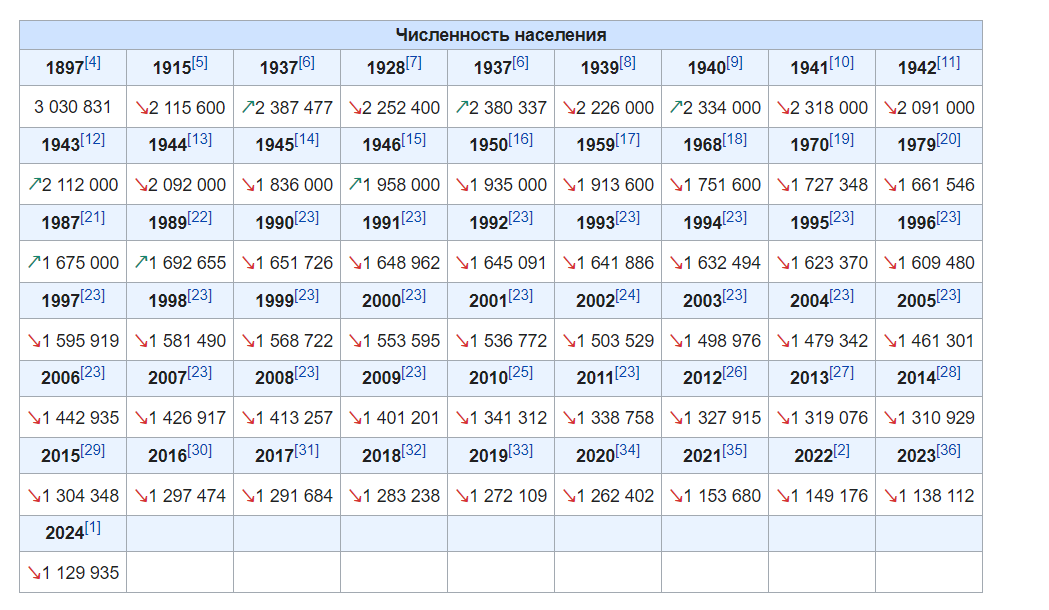

In [152]:
# Выделяем из общей даты год
kirovskaya_oblast['year'] = kirovskaya_oblast['datetime'].dt.year

#Считаем количество ДТП по годам и сохраняем результат в отдельный датафрейм
kirovskaya_oblast_dtp_years = kirovskaya_oblast['year'].value_counts().sort_index().to_frame()

display(kirovskaya_oblast_dtp_years)


# Созраняем столбец с кол-вом населения погадам в сотнях тысяч
kirovskaya_oblast_dtp_years['population'] = [13, 13, 13, 13, 13, 13, 12, 11, 11, 11]

# Рассчитываем кол-во ДТП на 100 тыс. населения
kirovskaya_oblast_dtp_years['on_100k'] = round(kirovskaya_oblast_dtp_years['count']/kirovskaya_oblast_dtp_years['population'], 2)

display(kirovskaya_oblast_dtp_years)

,count
year,
2015,1532
2016,1468
2017,1452
2018,1612
2019,1568
2020,1498
2021,1524
2022,1386
2023,1486


,count,population,on_100k
year,,,
2015,1532,13,117.85
2016,1468,13,112.92
2017,1452,13,111.69
2018,1612,13,124.00
2019,1568,13,120.62
2020,1498,13,115.23
2021,1524,12,127.00
2022,1386,11,126.00
2023,1486,11,135.09


Промежуточные итоги:

- Можно заметить, что по пошествию лет снижается кол-во ДТП. Это может быть связано с изменением ПДД, введением новых законов, большей осведомленностью граждан о том, что создает риски аварий на дорогах. Также стоит учитывать тот факт, что с уменьшением кол-ва ДТП уменьшалось и кол-во населения Кировской области.

Далее проделаем всю ту же работу, но уже по Московской области.

Как менялось население в Московской области по годам.

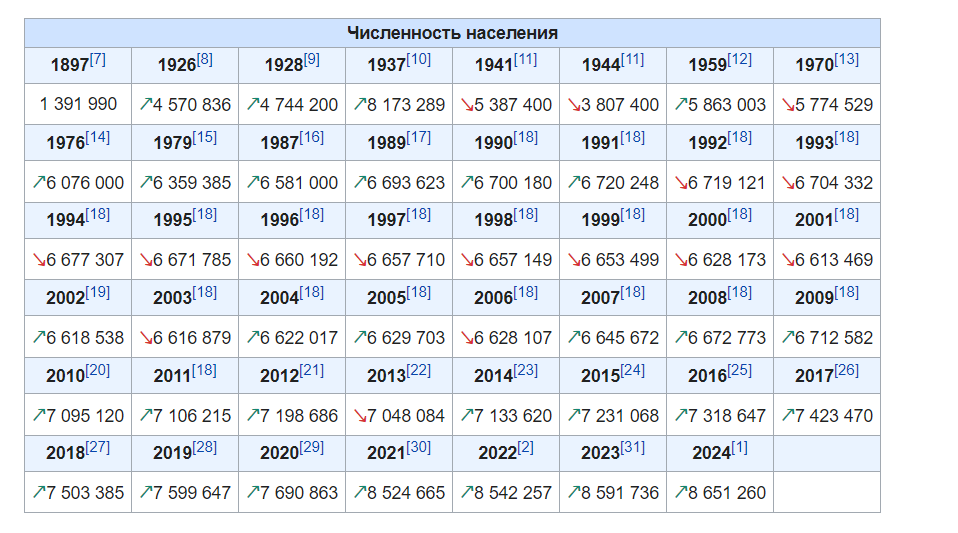

In [153]:
# Выделяем из общей даты год
moscowskaya_oblast['year'] = moscowskaya_oblast['datetime'].dt.year

#Считаем количество ДТП по годам и сохраняем результат в отдельный датафрейм
moscowskaya_oblast_dtp_years = moscowskaya_oblast['year'].value_counts().sort_index().to_frame()


# Созраняем столбец с кол-вом населения погадам в сотнях тысяч
moscowskaya_oblast_dtp_years['population'] = [72, 73, 74, 75, 76, 77, 85, 85, 86, 87]

# Рассчитываем кол-во ДТП на 100 тыс. населения
moscowskaya_oblast_dtp_years['on_100k'] = round(moscowskaya_oblast_dtp_years['count']/moscowskaya_oblast_dtp_years['population'], 2)

display(moscowskaya_oblast_dtp_years)

,count,population,on_100k
year,,,
2015,6643,72,92.26
2016,5794,73,79.37
2017,5747,74,77.66
2018,5102,75,68.03
2019,5111,76,67.25
2020,4216,77,54.75
2021,3898,85,45.86
2022,3353,85,39.45
2023,3372,86,39.21


Промежуточные итоги:

- Можно заметить, что по пошествию лет снижается кол-во ДТП. Это может быть связано с изменением ПДД, введением новых законов, большей осведомленностью граждан о том, что создает риски аварий на дорогах. Ситуция с кол-вом населения тут противоположная Кировской области: население с каждым годом увеличивалось, а количесвто ДТП уменьшалось.

# Итоговые выводы


- Все пункты предобработки были проведены в соотвествие с планом и к каждому пункту были даны рекомендации по перспективному улучшению хранения данных. С ними можно более подробно познакомиться в Промежуточных итогах каждого пункта.

- Рекомендуем более подробно изучить зависимость кол-ва ДТП от месяца и дня недели, если это необходимо. Стоит найти больше доказательств, которые подтвержадли бы или опровергали реальнуб зависимость кол-ва ДТП от месяца или дня недели.

- Рекомендуем сделать обязательным к заполнению столбец с водительским стажем, чтобы данные были более полные и зависимость стажа и кол-ва ДТП прослеживалась корректнее.

- Можно отметить, что в относительном выражении (на 100 тыс. населения) в Кировской области по всем годам кол-во ДТП больше, чем в Московской области. Тем не менее в обеих областях наблюдается снижение кол-ва ДТП, что является положительным аспектом. Главное не забывать про то, что в Кировской области мы наблюдаем снижение кол-ва населения, в Московской - увеличение.